### (0 баллов) Считываем данные

In [17]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [18]:
from sklearn.datasets import load_boston

dataset = load_boston()
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Каждая квартира имеет 13 признаков:

In [19]:
X = dataset['data']
X[:10]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00],
       [2.9850e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.4300e+00, 5.8700e

In [20]:
dataset['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [21]:
print(dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Хочется научиться предсказывать функцию цены квартиры. Предположительно, она зависит как-то от этих признаков.

In [22]:
y = dataset['target']
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

### (1 балл) Разделите данные на тренировочную и тестовую части.

Тестовая часть должна составлять 10% выборки.


In [23]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=111)

### (1 балл) Обучение и применение модели
Обучите модель линейной регрессии на тренировочной части и предскажите результаты на тестовой части.



In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
Lin_reg = LinearRegression().fit(X_train, y_train)
y_pred = Lin_reg.predict(X_test)

### (2 балл) Валидация результата

Напишите свою функцию MSE, убедитесь, что она совпадает с реализацией из sklearn и посчитайте своей результат на тестовой части.

In [36]:
from sklearn.metrics import mean_squared_error
def MSE(y_real, y_pred):
    
    return np.sum((y_real - y_pred) ** 2) / len(y_real)

In [37]:
print(MSE(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(MSE(y_test, y_pred) == mean_squared_error(y_test, y_pred))

31.57342251592756
31.57342251592756
True


Насколько хорошо вы предсказали цену? Сравните с наивным алгоритмом (предсказать среднюю цену на тренировочной части вне зависимости от признаков).

In [38]:
naive_predict = np.ones(y_pred.shape) * np.mean(y_test)

In [39]:
naive_error = mean_squared_error(y_test, naive_predict) 
linear_error = mean_squared_error(y_test, y_pred)

print(f'Naive: {naive_error}, Linear: {linear_error}.\nЛинейная регр. лучше справляется с задачей лучше в {naive_error / linear_error} раз')

Naive: 116.24199154171473, Linear: 31.57342251592756.
Линейная регр. лучше справляется с задачей лучше в 3.68164051531237 раз


### (2 балла) Улучшите результат.

Возможно, происходит переобучение, попробуйте применить регуляризацию, чтобы улучшить результат (то есть используйте Ridge вместо LinearRegression).

Нарисуйте график зависимости MSE от коэффициента регуляризации.

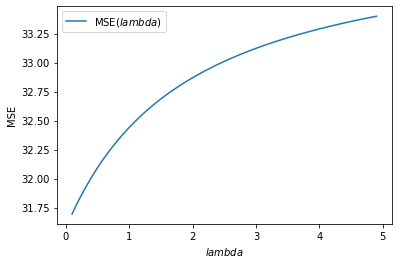

In [40]:
from sklearn.linear_model import Ridge

alphas = np.arange(0.1, 5, 0.1)
mse_errors = []

for alpha in alphas:
    Ridge_reg = Ridge(alpha=alpha).fit(X_train, y_train)
    y_pred = Ridge_reg.predict(X_test)

    mse_errors.append((alpha, mean_squared_error(y_test, y_pred)))


best_alpha, min_error = min(mse_errors, key=lambda x: x[1])
mse_errors = np.array(mse_errors)

plt.plot(alphas, mse_errors[:, 1], label='MSE($lambda$)')
plt.xlabel('$lambda$')
plt.ylabel('MSE')
plt.legend()
plt.show()

Помогает ли регуляризация? Какой коэффициент регуляризации надо выбрать, чтобы ошибка была минимальной? Чему при этом равна ошибка? Напишите выводы о проведенных экспериментах

In [41]:
print(f'Best alpha: {best_alpha}, Error: {min_error}')

Best alpha: 0.1, Error: 31.696014392219222


### Кажется, что регуляризация только ухудшила результат, не знаю как так получилось...